<a href="https://colab.research.google.com/github/mikemiauc/proyecto-dla-grupo-12/blob/main/DLA_Portfolio_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Optimización de valor de portafolio de acciones a través de una aplicación de aprendjizaje reforzado** 





# Yahoo - Finances

In [ ]:
Grupo = { 1:"Mike", 2:"Enrique", 3:"Mariano" }
usuario = 2

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Steps

+ Importing Libraries
+ Create the agent who will make all decisions
+ Define basic functions for formatting the values, sigmoid function, reading the data file, etc
+ Train the agent
+ Evaluate the agent performance

# 1. Importing Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import sys
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# 2. Create the Agent

In [ ]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import random
from collections import deque


class Agent:
	def __init__(self, portfolio_size , state_size , is_eval=False, model_name=""):
		self.state_size = state_size # normalized previous days
		self.portfolio_size = portfolio_size
		self.action_size = 3 # sit, buy, sell
		self.memory = deque(maxlen=1000)
		self.inventory = []
		self.model_name = model_name
		self.is_eval = is_eval

		self.gamma = 0.95
		self.epsilon = 1.0
		self.epsilon_min = 0.01
		self.epsilon_decay = 0.995

		self.model = load_model(model_name) if is_eval else self._model()

	def _model(self):
		model = Sequential()
		model.add(keras.layers.Input( shape=(self.portfolio_size , self.state_size) ) )
		model.add(keras.layers.Flatten() )
		model.add(Dense(units=64, activation="relu") )
		model.add(Dense(units=32, activation="relu"))
		model.add(Dense(units=8, activation="relu"))
		model.add(Dense(units=self.action_size*self.portfolio_size, activation="linear"))
		model.compile(loss="mse", optimizer=Adam(learning_rate=0.001),jit_compile=True)

		return model

	def act(self, state):
		if not self.is_eval and random.random() <= self.epsilon:
			print("opcion1:")
			vec_act = np.array( [random.randrange(self.action_size) for i in range(self.portfolio_size)] )
			return vec_act

		print("opcion2: ===========>", state.shape )
		state = np.expand_dims( state, axis=0 )
		print("opcion2: ===========>", state.shape )
		options = self.model.predict(state, verbose=0, use_multiprocessing=True, workers=4)[0]
		options2 = []

		for i in range(self.portfolio_size) :
			aux=np.argmax(options[i*3:(i*3)+3 ])
			options2.append(aux)
	 
		options2 = np.array(options2 )
		return options2

	def expReplay(self, batch_size):
		mini_batch = []
		l = len(self.memory)
		for i in range(l - batch_size + 1, l):
			mini_batch.append(self.memory[i])

		for state, action, reward, next_state, done in mini_batch:
			
			target = reward
			state = np.expand_dims(state, axis=0)
			next_state = np.expand_dims(next_state, axis=0)

			if not done:
				prediccion = self.model.predict(next_state, verbose=0, use_multiprocessing=True, workers=4)[0]
				for S_i in range(self.portfolio_size):
					target[S_i] = reward[S_i] + self.gamma * np.amax( prediccion[S_i*3:S_i*3+3] )

			target_f = self.model.predict(state, verbose=0)
	 
			for S_i in range(self.portfolio_size):
				target_f[0][S_i*3:S_i*3+action[S_i]] = target[S_i]

			self.model.fit(state, target_f, epochs=1, verbose=0, use_multiprocessing=True, workers=4)

		if self.epsilon > self.epsilon_min:
			self.epsilon *= self.epsilon_decay 

In [ ]:
# V2 del Agente
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import random
from collections import deque


class Agent:
	def __init__(self, portfolio_size , state_size , is_eval=False, model_name=""):
		self.state_size = state_size # normalized previous days
		self.portfolio_size = portfolio_size
		self.action_size = 3 # sit, buy, sell
		self.memory = deque(maxlen=1000)
		self.inventory = []
		self.model_name = model_name
		self.is_eval = is_eval

		self.gamma = 0.95
		self.epsilon = 1
		self.epsilon_min = 0.01
		self.epsilon_decay = 0.995
		self.alpha = 0.1

		self.model = load_model(model_name) if is_eval else self._model()

	def _model(self):
		model = Sequential()
		model.add(keras.layers.Input( shape=(self.portfolio_size , self.state_size) ) )
		model.add(keras.layers.Flatten() )
		model.add(Dense(units=64, activation="relu"))
		model.add(Dense(units=32, activation="relu"))
		model.add(Dense(units=8, activation="relu"))
		model.add(Dense(units=self.action_size*self.portfolio_size, activation="linear"))
		model.compile(loss="mse", optimizer=Adam(learning_rate=0.001),jit_compile=True)

		return model

	def act(self, state):
		if not self.is_eval and random.random() <= self.epsilon:
			print("opcion1:")
			vec_act = np.array( [random.randrange(self.action_size) for i in range(self.portfolio_size)] )
			return vec_act

		state = np.expand_dims( state, axis=0 )
		print("Class:act(self, state)=>state.shape=",state.shape)
		print("opcion2: ===========>", state.shape )
		options = self.model.predict(state, verbose=0, use_multiprocessing=True, workers=4)[0]
		print("opcions: ===========>", options )
		options2 = []

		for i in range(self.portfolio_size) :
			aux=np.argmax(options[i*3:(i*3)+3 ])
			options2.append(aux)
   
		print("options2=",options2)
		options2 = np.array(options2 )
		return options2

	def expReplay(self, batch_size):
		mini_batch = []
		l = len(self.memory)
		for i in range(l - batch_size + 1, l):
			mini_batch.append(self.memory[i])

		for state, action, reward, next_state, done in mini_batch:
			
			target = reward
			state = np.expand_dims(state, axis=0)
			next_state = np.expand_dims(next_state, axis=0)

			if not done:
				prediccion = self.model.predict(next_state, verbose=0, use_multiprocessing=True, workers=4)[0]
				#print("prediccion=", prediccion )

				for S_i in range(self.portfolio_size):
					#print("reward[{}]=".format(S_i),reward[S_i])
     
					#print("target[{v0}] = reward[{v0}]={v1} + gamma={v2} * np.amax={v3}".format(v0=S_i, v1=reward[S_i], v2=self.gamma, v3=np.amax( prediccion[S_i*3:S_i*3+3] ) ) )
					target[S_i] = (1-self.alpha)*reward[S_i] +  self.alpha * self.gamma * np.amax( prediccion[S_i*3:S_i*3+3] )
     
     
			#print("target[S_i]=", target )
			target_f = self.model.predict(state, verbose=0)
			#print("target_f=", target_f )
			#print("action=", action )
   
			for S_i in range(self.portfolio_size):
				target_f[0][S_i*self.portfolio_size+action[S_i]:S_i*self.portfolio_size+action[S_i]+1] = target[S_i]

			#print("target_f[0]=", target_f )
			self.model.fit(state, target_f, epochs=1, verbose=0, use_multiprocessing=True, workers=4)

		if self.epsilon > self.epsilon_min:
			self.epsilon *= self.epsilon_decay 

# 3. Define basic functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if usuario==1 :
  #Drive Mike
  gdrive_dataset_path = "/content/drive/MyDrive/MÍA UC/Bimestre 04/DL Avanzado/Proyecto DL Avanzado/datasets/"
  gdrive_model_path = "/content/drive/MyDrive/MÍA UC/Bimestre 04/DL Avanzado/Proyecto DL Avanzado/models/"

if usuario==2 :
#Drive Enrique
  gdrive_dataset_path = "/content/drive/MyDrive/Proyecto DL Avanzado/datasets/"
  gdrive_model_path = "/content/drive/MyDrive/Proyecto DL Avanzado/models/"

if usuario==3 :
  #Drive Mariano
  gdrive_dataset_path = "/content/drive/MyDrive/Proyecto DL Avanzado/datasets/"
  gdrive_model_path = "/content/drive/MyDrive/Proyecto DL Avanzado/models/"


In [ ]:
import os

In [ ]:
import yfinance as yf
import os

CARTERA = ['AGUAS-A.SN', 'ANDINA-B.SN', 'BCI.SN', 'BSANTANDER.SN', 'CAP.SN', 'CCU.SN',
'CENCOSUD.SN', 'CHILE.SN', 'CMPC.SN', 'COLBUN.SN', 'CONCHATORO.SN', 'COPEC.SN', 'ECL.SN',
'ENELAM.SN', 'ENELCHILE.SN', 'ENTEL.SN', 'FALABELLA.SN', 'IAM.SN', 'ILC.SN',
'ITAUCORP.SN', 'LTM.SN', 'MALLPLAZA.SN', 'PARAUCO.SN', 'RIPLEY.SN', 'SALFACORP.SN',
'SECURITY.SN', 'SONDA.SN', 'SQM-B.SN', 'VAPORES.SN']

def descargar_dataset(path=gdrive_dataset_path, portafolio=CARTERA, prefix="yf_"):
  import os
  if not os.path.exists(path[:-1]):
    os.mkdir( path )
  print("Guardando datasets en:\n{}\n\n".format(path) )

  for accion in portafolio:
    msft = yf.Ticker(accion)
    hist = msft.history(period="max")
    hist['ACCION']= accion
    hist.to_csv("{}/{}{}.csv".format(path,prefix, accion), encoding="UTF-8" )
    print("Historial de Accion:{} Guardada...".format(accion) )

In [ ]:
descargar_dataset()

Guardando datasets en:
/content/drive/MyDrive/Proyecto DL Avanzado/datasets/


Historial de Accion:AGUAS-A.SN Guardada...
Historial de Accion:ANDINA-B.SN Guardada...
Historial de Accion:BCI.SN Guardada...
Historial de Accion:BSANTANDER.SN Guardada...
Historial de Accion:CAP.SN Guardada...
Historial de Accion:CCU.SN Guardada...
Historial de Accion:CENCOSUD.SN Guardada...
Historial de Accion:CHILE.SN Guardada...
Historial de Accion:CMPC.SN Guardada...
Historial de Accion:COLBUN.SN Guardada...
Historial de Accion:CONCHATORO.SN Guardada...
Historial de Accion:COPEC.SN Guardada...
Historial de Accion:ECL.SN Guardada...
Historial de Accion:ENELAM.SN Guardada...
Historial de Accion:ENELCHILE.SN Guardada...
Historial de Accion:ENTEL.SN Guardada...
Historial de Accion:FALABELLA.SN Guardada...
Historial de Accion:IAM.SN Guardada...
Historial de Accion:ILC.SN Guardada...
Historial de Accion:ITAUCORP.SN Guardada...
Historial de Accion:LTM.SN Guardada...
Historial de Accion:MALLPLAZA.SN Guardada...

In [ ]:
ficheros

['/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_AGUAS-A.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_ANDINA-B.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_BCI.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_BSANTANDER.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_CAP.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_CCU.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_CENCOSUD.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_CHILE.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_CMPC.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_COLBUN.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_CONCHATORO.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_COPEC.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avanzado/datasets/yf_ECL.SN.csv',
 '/content/drive/MyDrive/Proyecto DL Avan

In [ ]:
from glob import glob
from datetime import datetime

# Aqui se configura un portafolio de entrenamiento

#fecha_min = datetime(2018,7,27)
fecha_min = datetime(2021,8,1)
fecha_max =  datetime(2022,8,30)

ficheros = glob(gdrive_dataset_path+"yf*.csv")

l_ficheros = []
l_ficheros_val = []

for f in ficheros:
  df_ficheros = pd.read_csv(f)
  df_ficheros['Date'] = [ datetime(int(i[:4]),int(i[5:7]),int(i[8:10]) ) for i in df_ficheros['Date'] ]
  #df_ficheros['Close'] = [  clp/ for clp in df_ficheros['Close'] ] linea para escalar los datos
  df_ficheros_train = df_ficheros[ (df_ficheros['Date'] >= fecha_min) &  (df_ficheros['Date'] <= fecha_max) ]
  l_ficheros.append(df_ficheros_train)

  df_fichero_val = df_ficheros[ df_ficheros['Date'] >= fecha_max ]
  l_ficheros_val.append( df_fichero_val )

#portafolio de entrenamiento
df_portfolio = pd.concat(l_ficheros)
df_portfolio_val = pd.concat(l_ficheros_val)

In [ ]:
print( df_portfolio.shape )
print( df_portfolio_val.shape )


(7917, 9)
(2001, 9)


In [ ]:
len(df_portfolio[df_portfolio['Date'] == datetime(2021,8,2)]['ACCION'].unique())

29

In [ ]:
# prints formatted price
def formatPrice(n):
	return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# returns the vector containing stock data from a fixed file
def getStockDataVec(portfolio):
  l = len(df_portfolio['Date'].unique())
  vec = np.empty((len(portfolio), l ))
  for n, pi in enumerate(portfolio):
    accion_tmp = df_portfolio[df_portfolio['ACCION']==pi]['Close']
    vec[n] = accion_tmp
  return vec

  return vec

# returns the sigmoid
def sigmoid(x):
	#x:= un vector de 3 filas y 1 columna
	m = np.empty(x.shape)
	for i in range(x.shape[0]):
		m[i] = 1 / (1 + np.exp(-x[i]) )
	return m

# returns an an n-day state representation ending at time t
def getState(data, t, n):
	d = t - n + 1
	if d >= 0:
		block = data[: , d:t + 1]

	else:
		blockl_slice1= data[: , 0:1 ]
		blockl_slice2= data[: ,0:t+1]
		block = np.concatenate((np.repeat(blockl_slice1 , -d, axis=1) , blockl_slice2 ), axis=1) # pad with t0

	res = np.zeros( shape=( data.shape[0] , n-1), dtype=np.float64 )
	for i in range(n - 1): #range(6-1) = 0,1,2,3,4
		res[: , i ] = sigmoid( block[:, i + 1] - block[: , i] )

	return res

In [ ]:
##debugin de funciones
def sigmoid(x):
	#x:= un vector de 3 filas y 1 columna
	m = np.empty(x.shape)
	for i in range(x.shape[0]):
		print("sigmoid(x)=>np.exp(-x[i])=", np.exp(-x[i]) ,"-x[i]=", -x[i] )
		m[i] = 1 / (1 + np.exp(-x[i]) )
	return m

def getState(data, t, n):
	d = t - n + 1
	if d >= 0:
		block = data[: , d:t + 1]
		#print("mod:getState=>if d >= 0:block=\n",block)

	else:
		blockl_slice1= data[: , 0:1 ]
		blockl_slice2= data[: ,0:t+1]
		block = np.concatenate((np.repeat(blockl_slice1 , -d, axis=1) , blockl_slice2 ), axis=1) # pad with t0
		print("MOD:block=\n", block)
		print("MOD:np.repeat(blockl_slice1 , -d, axis=1)=\n", np.repeat(blockl_slice1 , -d, axis=1))
		print("MOD:blockl_slice2=\n", blockl_slice2)
		print("MOD:blockl_slice1= data[: , 0:1 ]=\n", data[: , 0:1 ])
	

	#res = []
	res = np.zeros( shape=( data.shape[0] , n-1), dtype=np.float64 )
	for i in range(n - 1): #range(6-1) = 0,1,2,3,4
		res[: , i ] = sigmoid( block[:, i + 1] - block[: , i] )

	print("getState=>res.shape=",res.shape)

	return res

In [ ]:
d1 = np.array( [[0,1,2,3,4],[5,6,7,8,9] ]  , dtype=float)

x= d1[:, 0: ]
y= d1[ : , 0:1+1 ]
print("x{}=\n".format(x.shape),x)
print("y{}=\n".format(y.shape),y)
print( np.repeat(x, 4, axis=1) )
np.concatenate( (np.repeat(x, 4, axis=1) , y) , axis=1)

x(2, 5)=
 [[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
y(2, 2)=
 [[0. 1.]
 [5. 6.]]
[[0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4. 4. 4.]
 [5. 5. 5. 5. 6. 6. 6. 6. 7. 7. 7. 7. 8. 8. 8. 8. 9. 9. 9. 9.]]


array([[0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.,
        4., 4., 4., 4., 0., 1.],
       [5., 5., 5., 5., 6., 6., 6., 6., 7., 7., 7., 7., 8., 8., 8., 8.,
        9., 9., 9., 9., 5., 6.]])

In [ ]:
def getState_orig(data, t, n):
	d = t - n + 1
	#block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
	if d >= 0:
		block = data[d:t + 1]
		#print("Orig:getState=>if d >= 0:block=\n",block)
	
	else:
		block = -d * [data[0]] + data[0:t + 1]
		print("ORIG:block=\n", block)

	res = []
	for i in range(n - 1):
		res.append(sigmoid_orig(block[i + 1] - block[i]))

	return np.array([res])
 
def getStockDataVec_orig(key):
  l = len(df_portfolio['Date'].unique())
  vec = [ i for i in df_portfolio[df_portfolio['ACCION']==key]['Close'] ]
  return vec

def sigmoid_orig(x):
	print("sigmoid_orig(x)=>math.exp(-x)=", math.exp(-x) , "-x=", -x)
	return 1 / (1 + math.exp(-x))

In [ ]:
 data_test1 = getStockDataVec(['CONCHATORO.SN',])
 print("type(data_test1)=",type(data_test1))
 data_test2 = getStockDataVec_orig('CONCHATORO.SN')
 print("type(data_test2)=",type(data_test2))

 t1 = 5
 n1 = 5

 s1 = getState(data_test1, t1, n1)
 s2 = getState_orig(data_test2, t1, n1)

 print("s1", type(s1), s1, s1.dtype)
 print("s2", type(s2), s2, s2.dtype)
 print("abs(s2)-abs(s1)=\n", np.abs(s2)- np.abs(s1) )

type(data_test1)= <class 'numpy.ndarray'>
type(data_test2)= <class 'list'>
sigmoid(x)=>np.exp(-x[i])= 6.808128509829619e-08 -x[i]= -16.5025634765625
sigmoid(x)=>np.exp(-x[i])= 6.0303592643489e-07 -x[i]= -14.3212890625
sigmoid(x)=>np.exp(-x[i])= 226321.51817935347 -x[i]= 12.3297119140625
sigmoid(x)=>np.exp(-x[i])= 10052088.839761311 -x[i]= 16.123291015625
getState=>res.shape= (1, 4)
sigmoid_orig(x)=>math.exp(-x)= 6.808128509829619e-08 -x= -16.5025634765625
sigmoid_orig(x)=>math.exp(-x)= 6.0303592643489e-07 -x= -14.3212890625
sigmoid_orig(x)=>math.exp(-x)= 226321.51817935347 -x= 12.3297119140625
sigmoid_orig(x)=>math.exp(-x)= 10052088.839761311 -x= 16.123291015625
s1 <class 'numpy.ndarray'> [[9.99999932e-01 9.99999397e-01 4.41847328e-06 9.94818009e-08]] float64
s2 <class 'numpy.ndarray'> [[9.99999932e-01 9.99999397e-01 4.41847328e-06 9.94818009e-08]] float64
abs(s2)-abs(s1)=
 [[0. 0. 0. 0.]]


In [ ]:
data_test2[:10]

[311.03057861328125,
 311.03057861328125,
 311.03057861328125,
 311.03057861328125,
 309.7347412109375,
 311.03057861328125,
 318.43609619140625,
 328.4334411621094,
 328.4334411621094,
 329.61834716796875]

In [ ]:
df_portfolio[df_portfolio['ACCION']=='CONCHATORO.SN']

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ACCION
5470,2021-08-02,1242.437378,1251.921633,1214.933039,1242.437378,22803.0,0.0,0.0,CONCHATORO.SN
5471,2021-08-03,1230.582153,1256.663856,1225.555452,1230.582153,50464.0,0.0,0.0,CONCHATORO.SN
5472,2021-08-04,1247.084717,1251.826844,1223.658537,1247.084717,85020.0,0.0,0.0,CONCHATORO.SN
5473,2021-08-05,1261.406006,1283.599187,1247.084803,1261.406006,28572.0,0.0,0.0,CONCHATORO.SN
5474,2021-08-06,1249.076294,1275.632206,1237.790008,1249.076294,28632.0,0.0,0.0,CONCHATORO.SN
...,...,...,...,...,...,...,...,...,...
5738,2022-08-24,1115.090659,1126.540251,1105.234030,1114.194580,28720.0,0.0,0.0,CONCHATORO.SN
5739,2022-08-25,1106.130033,1135.002914,1103.541454,1108.021729,23553.0,0.0,0.0,CONCHATORO.SN
5740,2022-08-26,1093.784335,1114.991017,1086.217674,1092.987915,12093.0,0.0,0.0,CONCHATORO.SN
5741,2022-08-29,1086.217773,1112.601615,1060.331740,1086.217773,153696.0,0.0,0.0,CONCHATORO.SN


In [ ]:
#cargar el modelo entrenado si existe:
model_path = gdrive_model_path+ model_name + 'ep10'
print("Model path:", model_path)

model = load_model(model_path)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ACCION
5379,2021-08-02,1610.378540,1656.082105,1600.520908,1610.378540,168964.0,0.0,0.0,ANDINA-B.SN
5380,2021-08-03,1601.596313,1626.509282,1586.361791,1601.596313,78748.0,0.0,0.0,ANDINA-B.SN
5381,2021-08-04,1613.066895,1629.197563,1586.003260,1613.066895,58800.0,0.0,0.0,ANDINA-B.SN
5382,2021-08-05,1647.837524,1648.912859,1611.991593,1647.837524,76562.0,0.0,0.0,ANDINA-B.SN
5383,2021-08-06,1630.990112,1647.031191,1627.405519,1630.990112,28364.0,0.0,0.0,ANDINA-B.SN
...,...,...,...,...,...,...,...,...,...
5728,2022-08-24,83.510002,87.500000,83.099998,83.510002,4754524.0,0.0,0.0,VAPORES.SN
5729,2022-08-25,85.599998,85.599998,83.000000,85.599998,7255049.0,0.0,0.0,VAPORES.SN
5730,2022-08-26,84.199997,85.000000,83.000000,84.199997,2536741.0,0.0,0.0,VAPORES.SN
5731,2022-08-29,84.199997,85.339996,83.309998,84.199997,7164703.0,0.0,0.0,VAPORES.SN


In [ ]:
e

6

# 4. Train the agent

In [ ]:
import sys
from tqdm import tqdm
import time

stock_name, window_size, episode_count =  ['AGUAS-A.SN', 'ANDINA-B.SN', 'ENELAM.SN', 'RIPLEY.SN', 'SECURITY.SN'], 30, 10

agent = Agent( len(stock_name) , window_size)
#data vectorizado
data = getStockDataVec(stock_name)
l = data.shape[1] - 1
batch_size = 32

start = time.time()

for e in range(episode_count + 1):
  #print("Episode " + str(e) + "/" + str(episode_count))
  state = getState(data, 0, window_size + 1)

  episode_start = time.time()

  total_profit = 0
  total_stock = np.zeros( len(stock_name) , dtype=float )
  total_profit_stock = []

  contador_compra =  np.zeros( len(stock_name) , dtype=float )
  contador_venta =  np.zeros( len(stock_name) , dtype=float )

  agent.inventory = [[] for i in range( len(stock_name) )]
  
  for t in range(l):
    t_start = time.time()
    print("Episode: " + str(e) + "/" + str(episode_count) + ", t=" + str(t) + "/" + str(l) )
    #ahora action es un vector de acciones
    action = agent.act(state)
    # sit
    # next_state es el vector de estado
    next_state = getState(data, t + 1, window_size + 1)
    reward = np.zeros( len(stock_name) , dtype=float )

    for S_i in range( len(stock_name) ): #0:S1, 1:S2...
      
      if action[S_i] == 1: # buy
        contador_compra[S_i] += 1
        agent.inventory[S_i].append(data[S_i, t])
        print(stock_name[S_i],":\tBuy: " + formatPrice(data[S_i, t]))

      elif action[S_i] == 2 and len(agent.inventory[S_i]) > 0: # sell
        contador_venta[S_i] += 1
        bought_price = agent.inventory[S_i].pop(0)
        reward[S_i] = max(data[S_i, t] - bought_price, 0)
        total_profit += data[S_i, t] - bought_price
        total_stock[S_i] += data[S_i, t] - bought_price
        print(stock_name[S_i],":\tSell: " + formatPrice(data[S_i, t]) + " | Profit: " + formatPrice(data[S_i, t] - bought_price))
      
      print("===> Tam Inventario(Stock={})=".format(S_i), len(agent.inventory[S_i]) )
      print("===> Compra[{v1}]= {v2} , Venta[{v1}]={v3}".format(v1=S_i, v2=contador_compra[S_i], v3=contador_venta[S_i] ) )

      done = True if t == l - 1 else False
      agent.memory.append((state, action, reward, next_state, done))
      state = next_state

    if done:
      print("--------------------------------")
      for i in range( len(stock_name) ):
        print('"{}"'.format( stock_name[i] ), "=",  total_stock[i]*1000 )
      print("Total Profit: " + formatPrice(total_profit))
      print("--------------------------------")

    if len(agent.memory) > batch_size:
      print("=>EXP REPLAY")
      agent.expReplay(batch_size)

    total_profit_stock.append(total_stock)
    print("Iteracion t="+str(t) + " time:" + str( time.time()-t_start ) + " sec" )
    

  agent.model.save("model_ite4_spm01_ep_" + str(e))

  print("Episode [", e ,"] time:", "{:.2f}".format(time.time()-episode_start) ," sec")

agent.model.save(gdrive_model_path+"model_ite4_spm01_final")
np.save( gdrive_model_path + 'total_profit_ite4_stock.npy', np.array(total_profit_stock) )

print("Total elapsed time:", str(time.time()-start)," sec")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 0.5009455  0.         0.        ]
options2= [2, 2, 1, 1, 0]
===> Tam Inventario(Stock=0)= 0
===> Compra[0]= 1.0 , Venta[0]=1.0
===> Tam Inventario(Stock=1)= 0
===> Compra[1]= 0.0 , Venta[1]=0.0
ENELAM.SN :	Buy: $101.49
===> Tam Inventario(Stock=2)= 27
===> Compra[2]= 27.0 , Venta[2]=0.0
RIPLEY.SN :	Buy: $139.90
===> Tam Inventario(Stock=3)= 24
===> Compra[3]= 27.0 , Venta[3]=3.0
===> Tam Inventario(Stock=4)= 0
===> Compra[4]= 0.0 , Venta[4]=0.0
=>EXP REPLAY
Iteracion t=29 time:5.238732576370239 sec
Episode: 10/10, t=30/272
Class:act(self, state)=>state.shape= (1, 5, 30)
opcion2: ===========> (1, 5, 30)
opcions: ===========> [0.03091395 0.11079186 0.11607616 0.         0.         0.17522709
 0.09947613 0.11931386 0.         0.         0.10265818 0.08221127
 0.5009455  0.         0.        ]
options2= [2, 2, 1, 1, 0]
===> Tam Inventario(Stock=0)= 0
===> Compra[0]= 1.0 , Venta[0]=1.0
===> Tam Inventario(Stock=1)= 0
===> C

In [ ]:
agent.model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 5)                 0         
                                                                 
 dense_167 (Dense)           (None, 64)                384       
                                                                 
 dense_168 (Dense)           (None, 32)                2080      
                                                                 
 dense_169 (Dense)           (None, 8)                 264       
                                                                 
 dense_170 (Dense)           (None, 3)                 27        
                                                                 
Total params: 2,755
Trainable params: 2,755
Non-trainable params: 0
_________________________________________________________________


In [ ]:
agent.model.save(gdrive_model_path+"model_spm01_final")
np.save( gdrive_model_path + 'total_profit_stock.npy', np.array(total_profit_stock) )

In [ ]:
!cp -r /content/model_ite4_spm01_ep_0 /content/drive/MyDrive/models/model_ite4_spm01_ep0
!cp -r /content/model_ite4_spm01_ep_1 /content/drive/MyDrive/models/model_ite4_spm01_ep1
!cp -r /content/model_ite4_spm01_ep_2 /content/drive/MyDrive/models/model_ite4_spm01_ep2
!cp -r /content/model_ite4_spm01_ep_3 /content/drive/MyDrive/models/model_ite4_spm01_ep3
!cp -r /content/model_ite4_spm01_ep_4 /content/drive/MyDrive/models/model_ite4_spm01_ep4
!cp -r /content/model_ite4_spm01_ep_5 /content/drive/MyDrive/models/model_ite4_spm01_ep5
!cp -r /content/model_ite4_spm01_ep_6 /content/drive/MyDrive/models/model_ite4_spm01_ep6
!cp -r /content/model_ite4_spm01_ep_7 /content/drive/MyDrive/models/model_ite4_spm01_ep7
!cp -r /content/model_ite4_spm01_ep_8 /content/drive/MyDrive/models/model_ite4_spm01_ep8
!cp -r /content/model_ite4_spm01_ep_9 /content/drive/MyDrive/models/model_ite4_spm01_ep9
!cp -r /content/model_ite4_spm01_ep_10 /content/drive/MyDrive/models/model_ite4_spm01_ep10

In [ ]:
agent.model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 5)                 0         
                                                                 
 dense_44 (Dense)            (None, 64)                384       
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 8)                 264       
                                                                 
 dense_47 (Dense)            (None, 3)                 27        
                                                                 
Total params: 2,755
Trainable params: 2,755
Non-trainable params: 0
_________________________________________________________________


# 5. Evaluate the Agent

In [ ]:
# re-definimos la función para evaluar utilizando el df de evaluacion = df_portfolio_val
def getStockDataVec(x):
  l = len(df_portfolio_val['Date'].unique())
  vec = np.empty((len(x), l ))
  for n, pi in enumerate(x):
    accion_tmp = df_portfolio_val[df_portfolio_val['ACCION']==pi]['Close']
    vec[n] = accion_tmp
  return vec

In [ ]:
gdrive_model_path = "/content/drive/MyDrive/Proyecto DL Avanzado/models/"

In [ ]:
import keras
from keras.models import load_model
import pickle
import sys

eval_history = []
window_size = 30

#stock_name, model_name = ['AGUAS-A.SN', 'ANDINA-B.SN', 'BSANTANDER.SN'] , "model_spm01_"
stock_name, model_name = ['AGUAS-A.SN', 'ANDINA-B.SN', 'ENELAM.SN', 'RIPLEY.SN', 'SECURITY.SN'] , "model_ite4_spm01_"

model_path = gdrive_model_path+ model_name + 'ep0'
print("Model path:", model_path)

model = load_model(model_path)

window_size = model.layers[0].input.shape.as_list()[2]
portafolio_size = model.layers[0].input.shape.as_list()[1]

agent = Agent(portafolio_size, window_size, True, model_name=model_path)


data = getStockDataVec(stock_name)

l = data.shape[1] - 1
batch_size = 32

state = getState(data, 0, window_size + 1)

total_profit = 0
total_stock_val = np.zeros( len(stock_name) , dtype=float )
agent.inventory = [[] for i in range( len(stock_name) )]
total_profit_stock_val = []

for t in range(l):
	print("t=",t)
	action = agent.act(state)

	# store action history
	#eval_history.append([t,data[:,t],action, total_profit])
 
	# sit
	next_state = getState(data, t + 1, window_size + 1)
	reward = np.zeros( len(stock_name) , dtype=float )
	'''
	for S_i in range(len(stock_name)):
		print("ACTION:" + str(action[S_i]), "INV:", len(agent.inventory))
		if action == 0:
			print("Sit. ")
		elif action == 1: # buy
			agent.inventory.append(data[t])
			print("Buy: " + formatPrice(data[t]))
		elif action == 2 and len(agent.inventory) > 0: # sell
			bought_price = agent.inventory.pop(0)
			reward = max(data[t] - bought_price, 0)
			total_profit += data[t] - bought_price
			print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

	done = True if t == l - 1 else False
	agent.memory.append((state, action, reward, next_state, done))
	state = next_state
	'''

	for S_i in range( len(stock_name) ): #0:S1, 1:S2... 
		print("action[{}]=".format(S_i), action[S_i] )   
		if action[S_i] == 1: # buy
			agent.inventory[S_i].append(data[S_i, t])
			print(stock_name[S_i],":\tBuy: " + formatPrice(data[S_i, t]))

		elif action[S_i] == 2 and len(agent.inventory[S_i]) > 0: # sell
			bought_price = agent.inventory[S_i].pop(0)
			reward[S_i] = max(data[S_i, t] - bought_price, 0)
			total_profit += data[S_i, t] - bought_price
			total_stock_val[S_i] += data[S_i, t] - bought_price
			print(stock_name[S_i],":\tSell: " + formatPrice(data[S_i, t]) + " | Profit: " + formatPrice(data[S_i, t] - bought_price))
	 
		else:
			print("Sit. ")
		print("Tam.Inventario=", len( agent.inventory[S_i]) )
 	
	total_profit_stock_val.append( total_stock_val )
	done = True if t == l - 1 else False
	agent.memory.append((state, action, reward, next_state, done))
	state = next_state
	eval_history.append([t,data[:,t],action, total_profit])
	if done:
		print("--------------------------------")
		print(" Total Profit: " + formatPrice(total_profit))
		print("--------------------------------")

Model path: /content/drive/MyDrive/Proyecto DL Avanzado/models/model_ite4_spm01_ep0
t= 0
Class:act(self, state)=>state.shape= (1, 5, 30)
opcion2: ===========> (1, 5, 30)
opcions: ===========> [ 1.4334532  1.3772942  2.632987  29.259571  -5.330261  22.59336
 21.068163  28.536022   6.876276  -3.338014  23.123596  22.170444
 21.918768  -6.453815  -6.899856 ]
options2= [2, 0, 1, 1, 0]
action[0]= 2
Sit. 
Tam.Inventario= 0
action[1]= 0
Sit. 
Tam.Inventario= 0
action[2]= 1
ENELAM.SN :	Buy: $99.31
Tam.Inventario= 1
action[3]= 1
RIPLEY.SN :	Buy: $161.98
Tam.Inventario= 1
action[4]= 0
Sit. 
Tam.Inventario= 0
t= 1
Class:act(self, state)=>state.shape= (1, 5, 30)
opcion2: ===========> (1, 5, 30)
opcions: ===========> [ 1.4256655  1.3583671  2.6105385 29.046762  -5.280332  22.441973
 20.914917  28.33825    6.826748  -3.3210363 22.951145  22.0202
 21.756168  -6.4032264 -6.8532233]
options2= [2, 0, 1, 1, 0]
action[0]= 2
Sit. 
Tam.Inventario= 0
action[1]= 0
Sit. 
Tam.Inventario= 0
action[2]= 1
ENELAM.S

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
eval_history

[[0, array([ 196.16598511, 1799.5255127 ,   99.30999756,  161.97999573,
          138.06326294]), array([2, 0, 1, 1, 0]), 0],
 [1, array([ 190.943573  , 1800.80041504,   97.09999847,  164.        ,
          137.86198425]), array([2, 0, 1, 1, 0]), 0],
 [2, array([ 187.97738647, 1798.64282227,   97.19999695,  178.42999268,
          139.99932861]), array([2, 0, 1, 1, 0]), 0],
 [3, array([ 201.31057739, 1887.78552246,  101.95999908,  183.        ,
          150.62841797]), array([2, 0, 1, 1, 0]), 0],
 [4, array([ 206.85391235, 1859.93457031,  101.98000336,  186.1000061 ,
          153.68583679]), array([2, 0, 1, 1, 0]), 0],
 [5, array([ 194.50297546, 1746.66748047,  100.90000153,  178.8999939 ,
          143.69888306]), array([2, 0, 1, 1, 0]), 0],
 [6, array([ 188.86238098, 1750.49206543,  100.90000153,  172.5       ,
          141.05358887]), array([2, 0, 1, 1, 0]), 0],
 [7, array([ 187.69537354, 1755.39538574,  100.90000153,  164.58999634,
          137.21025085]), array([2, 0, 1, 1, 0

In [ ]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 50)

In [ ]:
def dibujar(id):
  iteracion = []
  valor_stock = []
  accion_compra = []
  accion_vender = []
  accion_mantener = []
  profit = []
  total = []

  fig = plt.figure(figsize=(20,5) )
  for i in eval_history:
      iteracion.append(i[0]) 
      
      valor_stock.append(  i[1][id]  )
      accion_compra.append(  total[i] + 20 if i[2][id]==1 else np.nan  )
      accion_vender.append(  total[i] + 10 if i[2][id]==2 else np.nan  )
      accion_mantener.append(  total[i] if i[2][id]==0 else np.nan  )
      profit.append(  i[3] )
    
  plt.title( stock_name[id] )
  plt.plot(valor_stock, color="blue", alpha=0.5 )
  plt.scatter(iteracion, accion_vender ,marker="^", s=50., color="g" )
  plt.scatter(iteracion, accion_compra ,marker=".", s=50., color="r" )
  plt.scatter(iteracion, accion_mantener ,marker="_", s=50., color="g")

  plt.show()
  plt.close(fig)


In [ ]:
  iteracion = []
  contador_compras = []
  contador_ventas = []
  contador_mantener = []

for i in eval_history:
    iteracion.append(i[0])
    contador_mantener.append(len(i[2][ i[2] == 0]) )
    contador_compras.append(len(i[2][ i[2] == 1]) )
    contador_ventas.append(len(i[2][ i[2] == 2]) )

In [ ]:
total =df_portfolio_val[['Date','Close']].groupby("Date").sum()['Close'].tolist()
total = total[:-1]

In [ ]:
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

NameError: ignored

68
68


[]

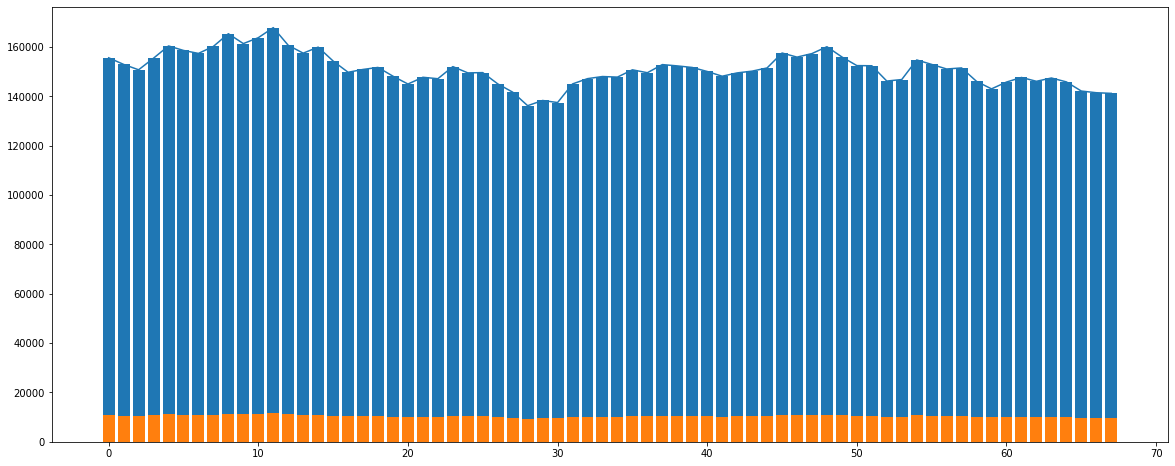

In [ ]:
fig = plt.figure(figsize=(20, 8))
print(len(iteracion))
print(len(total))
plt.plot(total)

textos_comprar = [ "C={}".format(i) for i in contador_compras]
textos__mantener = [ "M={}".format(i) for i in contador_mantener]
textos__vender = [ "V={}".format(i) for i in contador_ventas]

plt.bar( iteracion , total )
plt.bar( iteracion , [ i*(2/29) for i in total] )

plt.plot()

In [ ]:
#df_portfolio_val = df_portfolio_val[df_portfolio_val['Date']< datetime(2022,12,12) ]
total =df_portfolio_val[['Date','Close']].groupby("Date").sum()['Close'].tolist()
len(total)

68

0


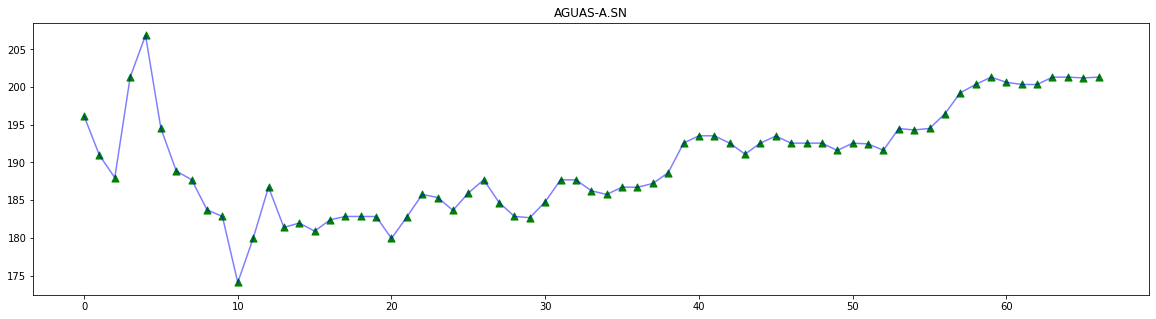

1


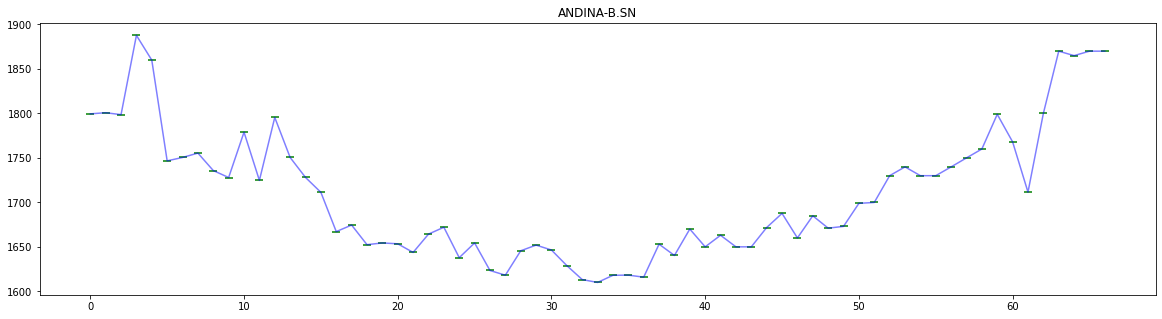

2


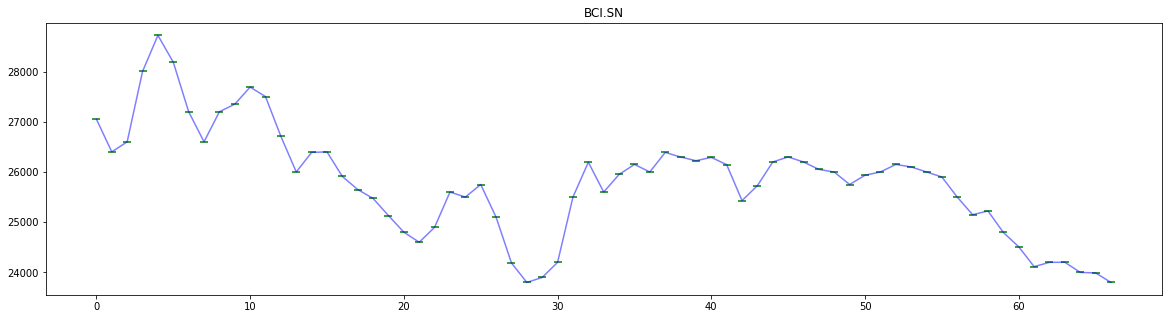

3


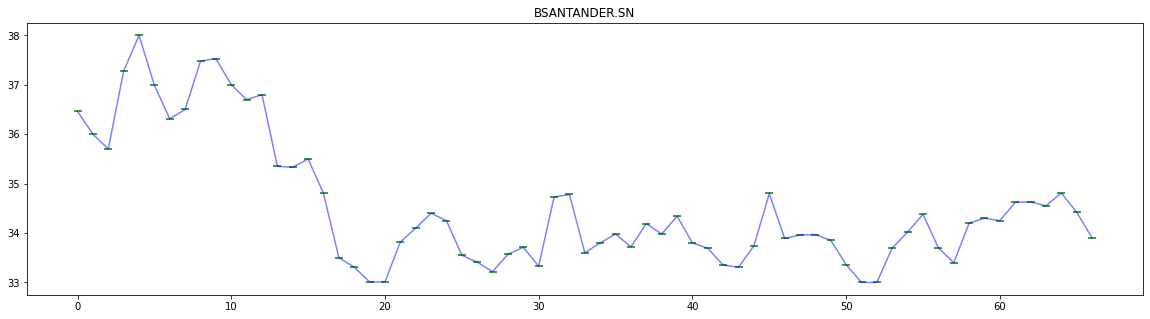

4


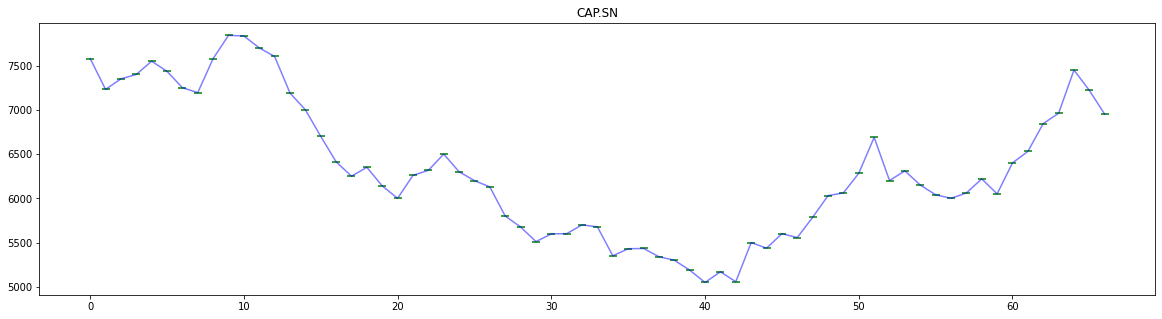

5


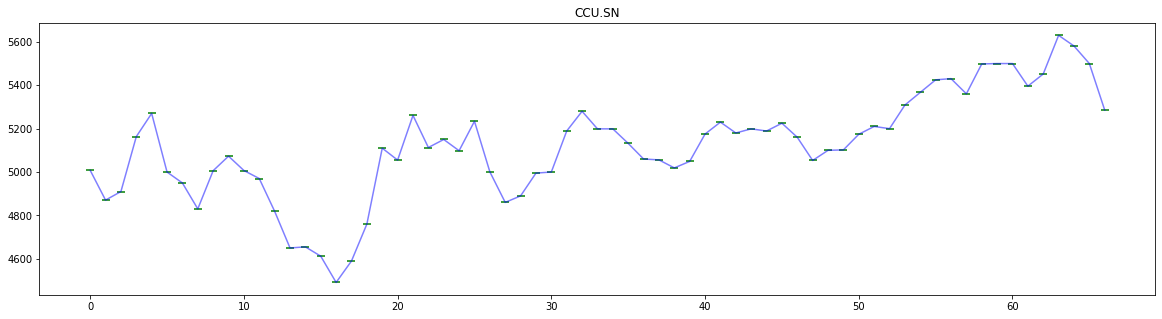

6


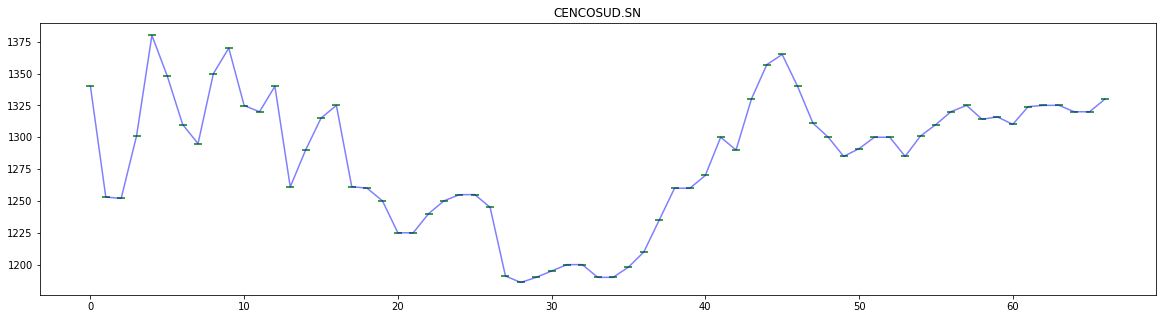

7


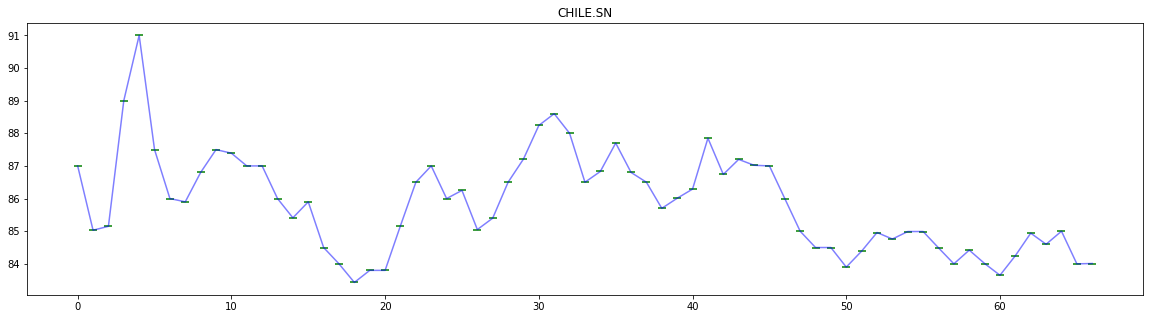

8


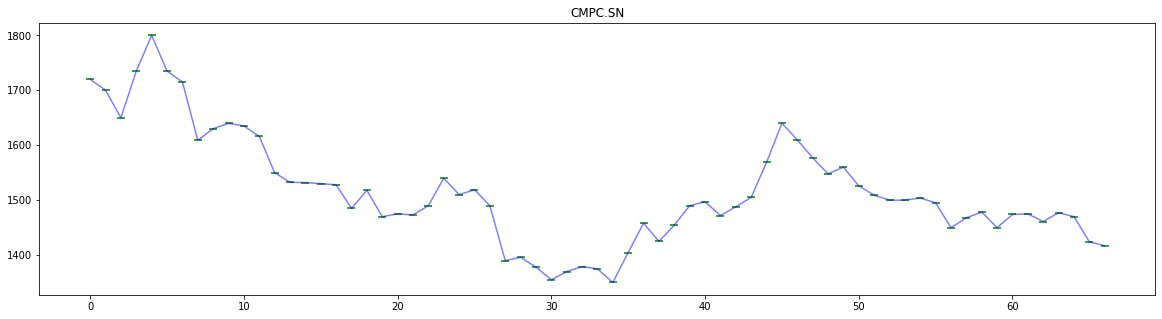

9


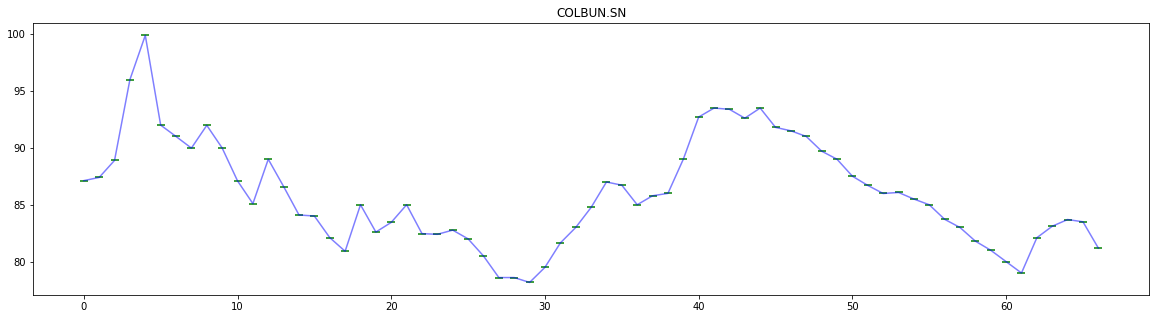

10


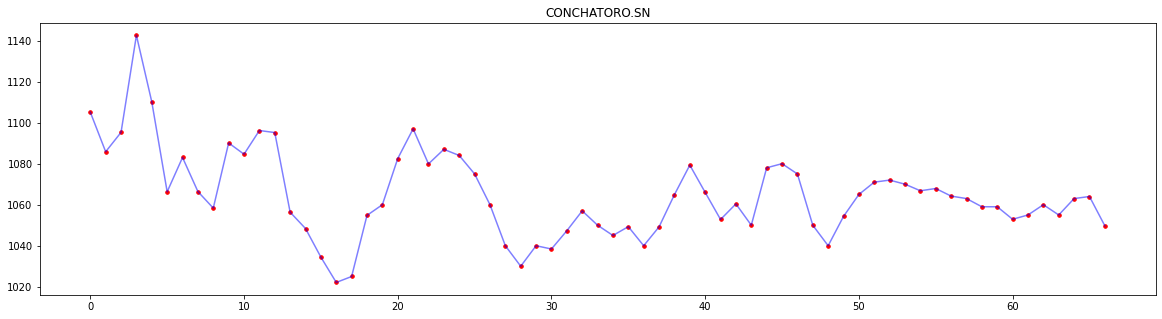

11


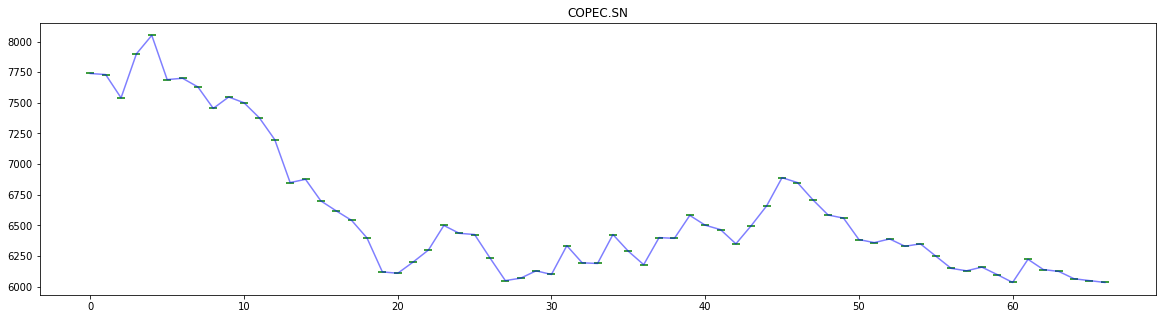

12


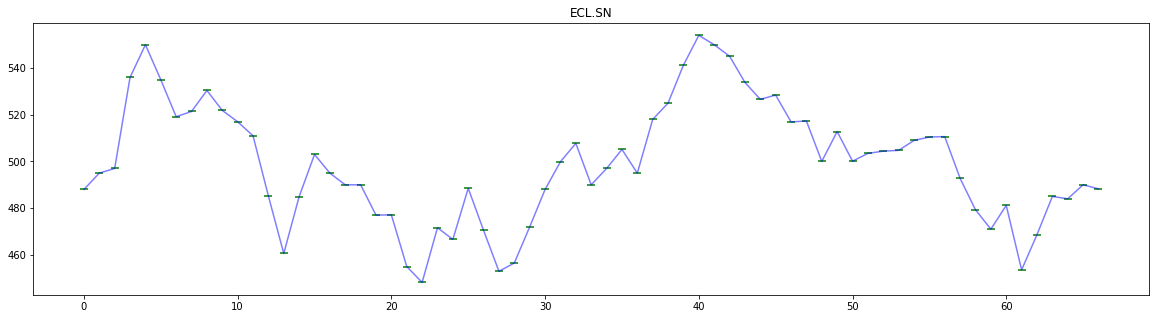

13


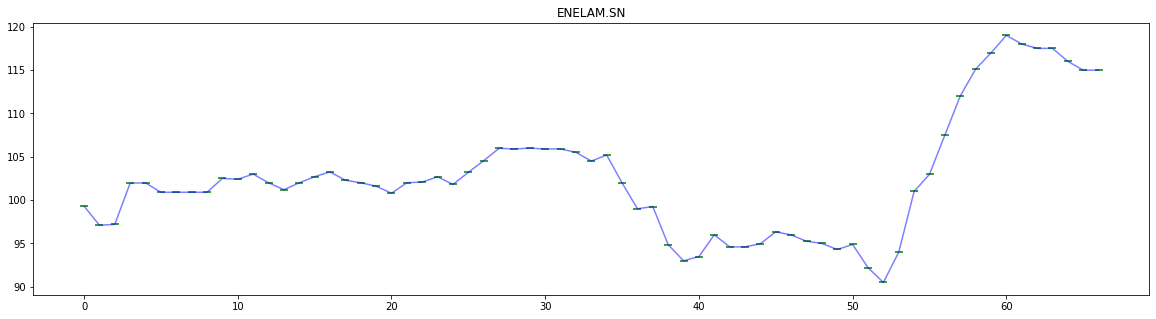

14


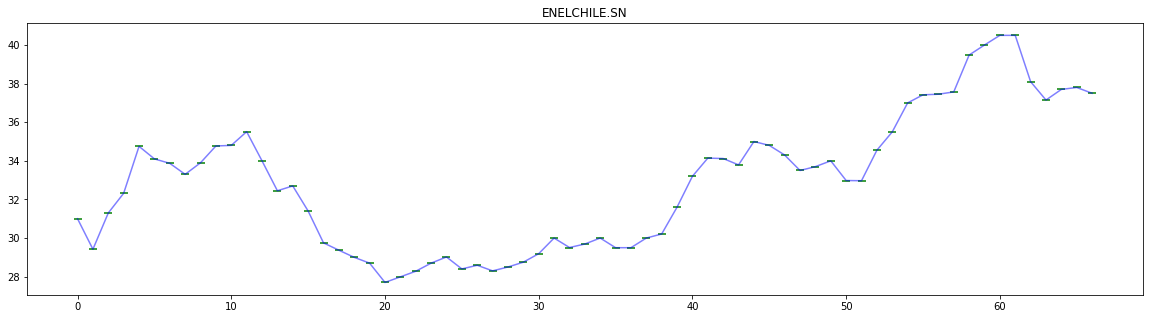

15


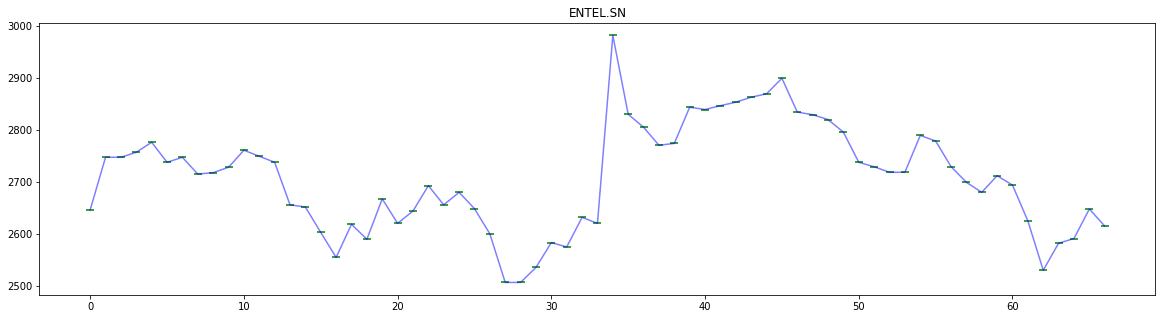

16


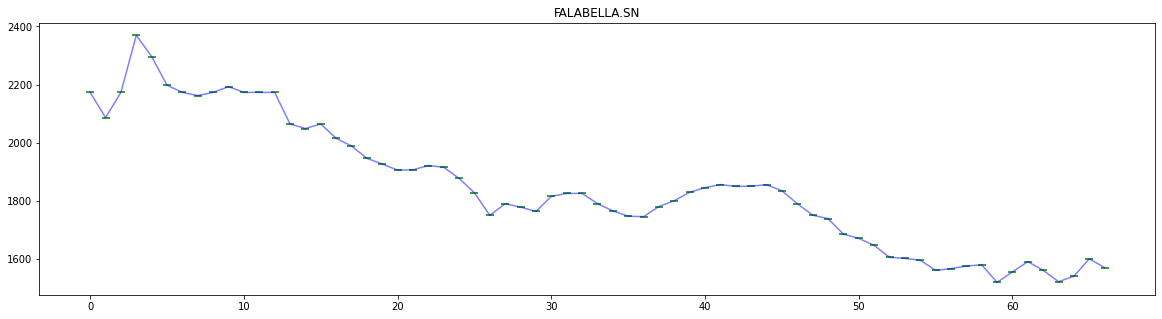

17


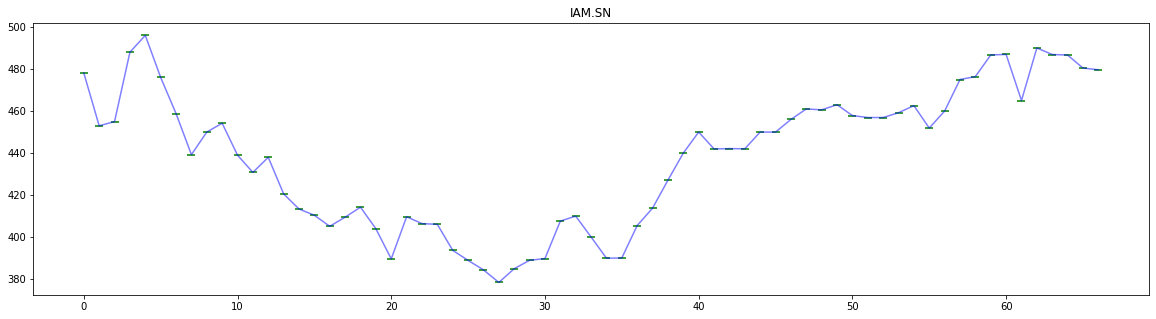

18


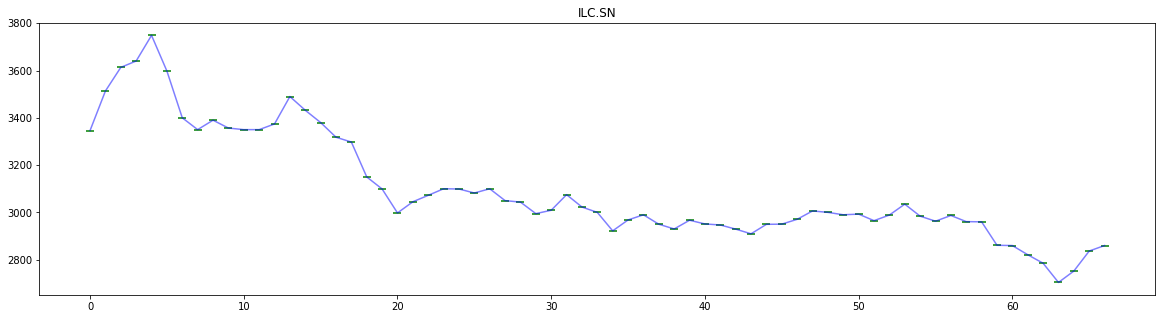

19


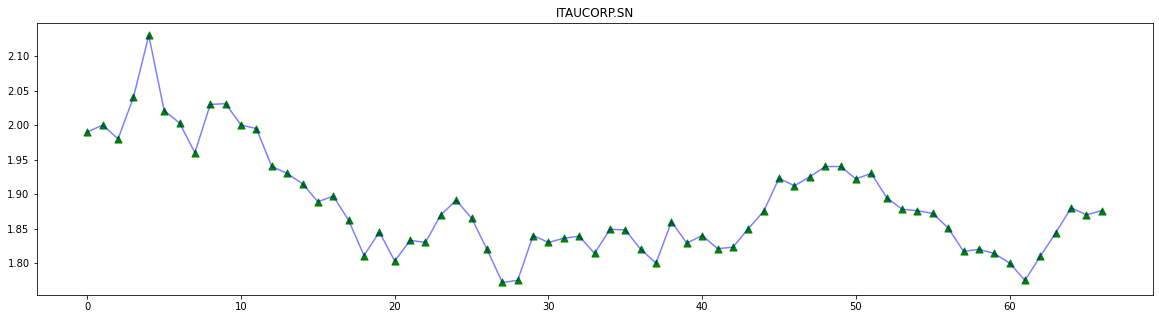

20


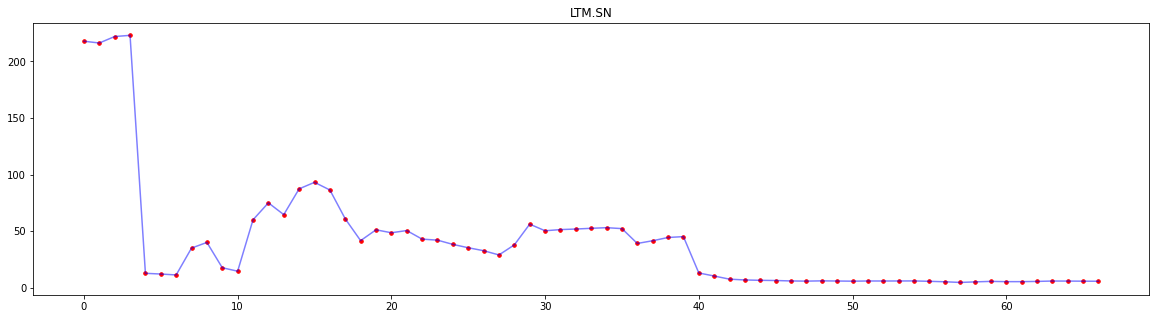

21


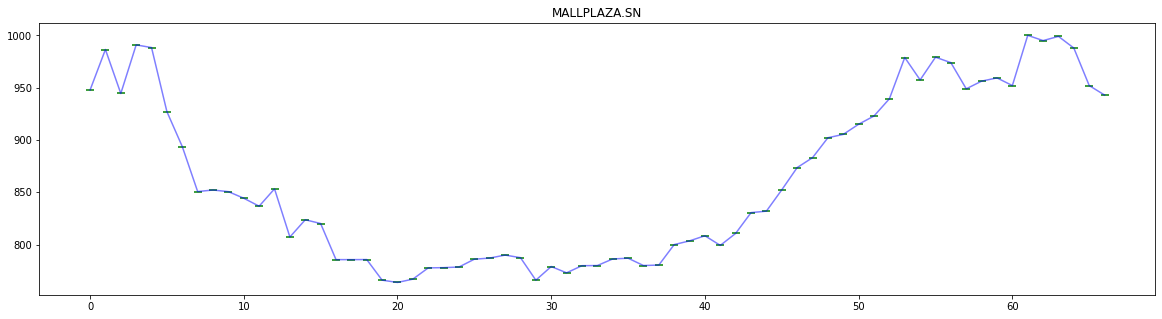

22


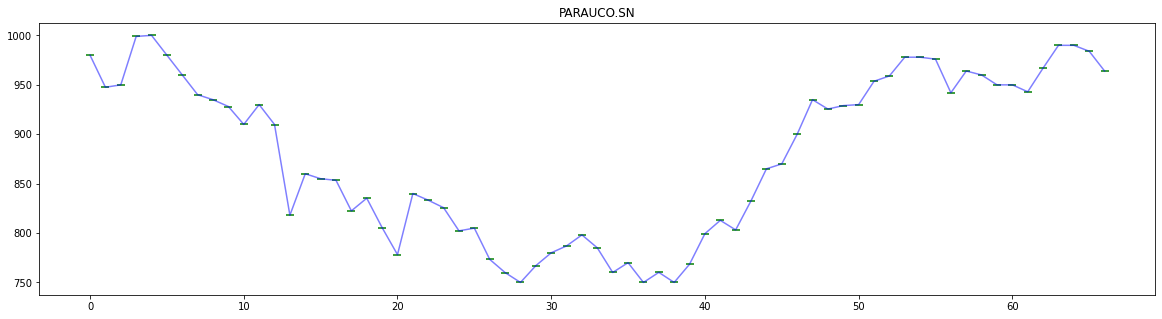

23


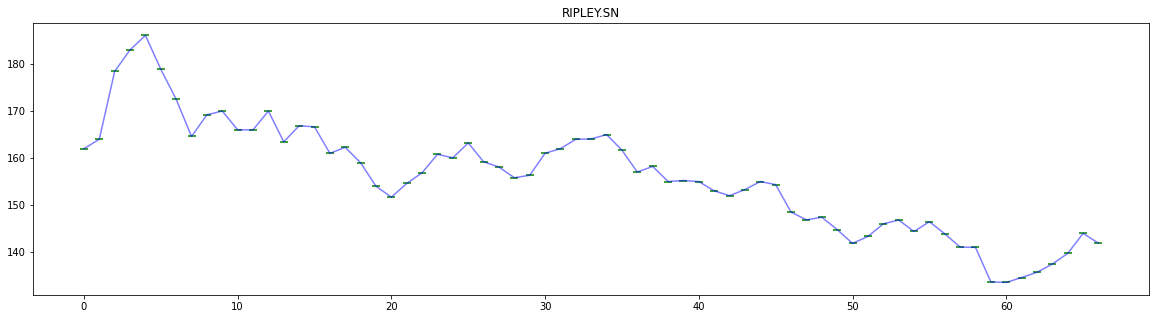

24


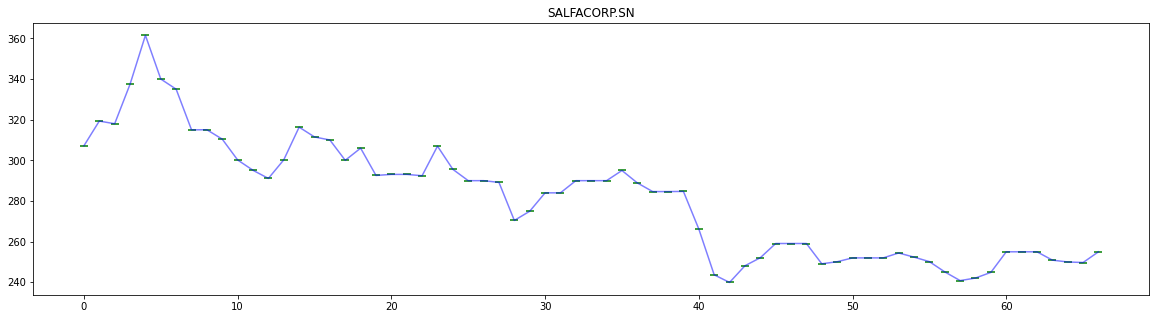

25


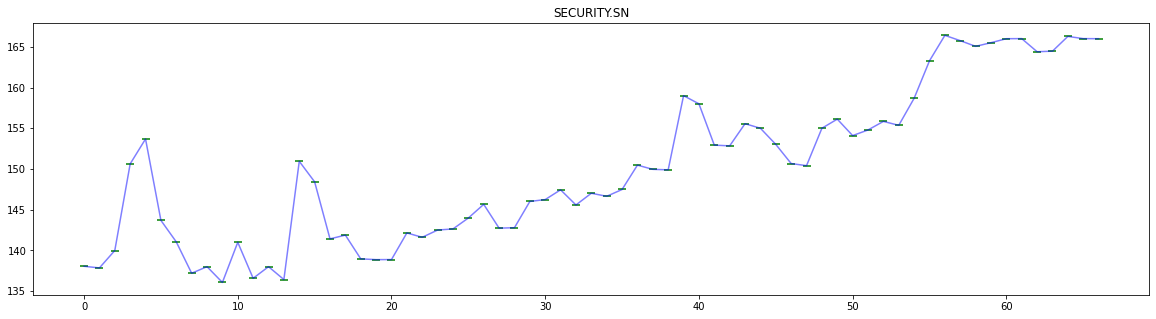

26


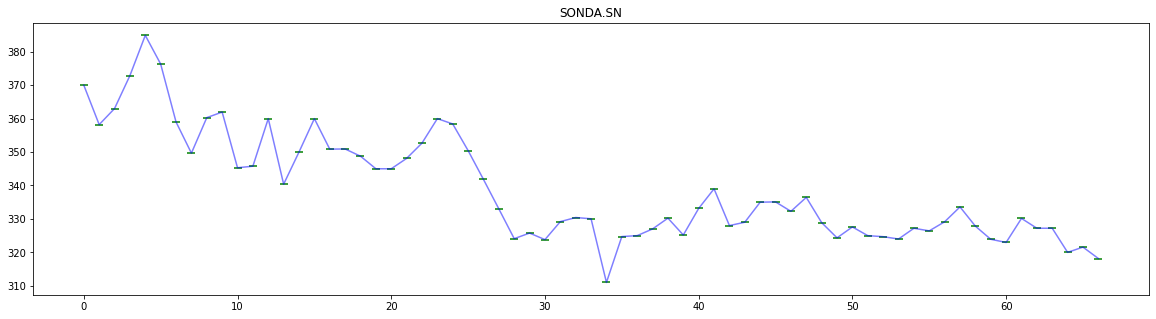

27


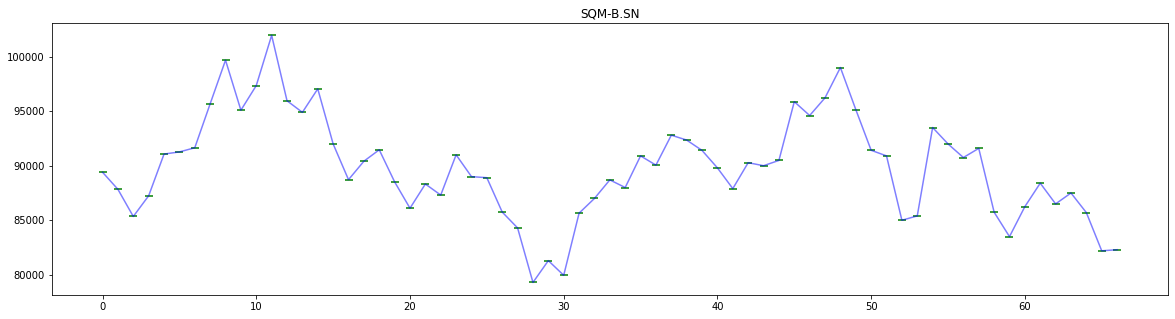

28


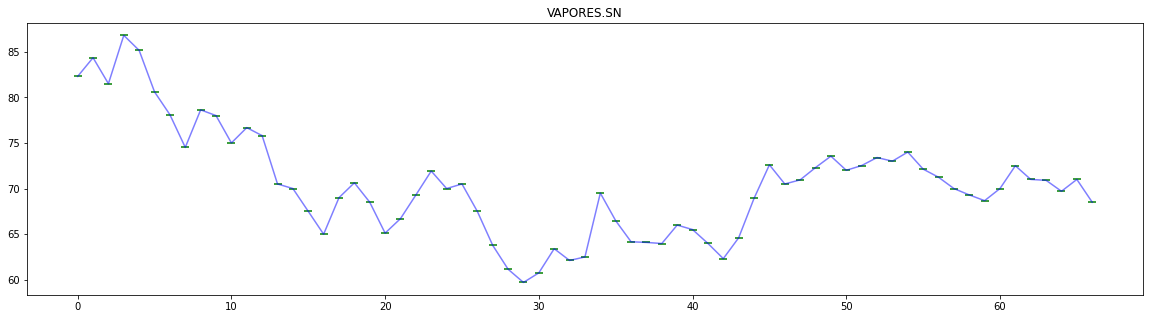

In [ ]:
for n,i in enumerate(range(len(stock_name))):
  print(i)
  dibujar(i)

  

In [ ]:
eval_history

[[0, array([2.01710007e+02, 1.79952551e+03, 2.70500000e+04, 3.64599991e+01,
         7.58000000e+03, 5.00800000e+03, 1.34000000e+03, 8.70000000e+01,
         1.71990637e+03, 8.71200027e+01, 1.10513440e+03, 7.74000000e+03,
         4.88000000e+02, 9.93099976e+01, 3.10000000e+01, 2.64625903e+03,
         2.17288354e+03, 4.78109985e+02, 3.34610010e+03, 1.99000001e+00,
         2.17929993e+02, 9.47679443e+02, 9.80000000e+02, 1.61979996e+02,
         3.07160004e+02, 1.38063263e+02, 3.70001129e+02, 8.94008828e+04,
         8.23000031e+01]), array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
         0, 0, 0, 0, 0, 0, 0]), 0],
 [1, array([1.96339996e+02, 1.80080042e+03, 2.64000000e+04, 3.60000000e+01,
         7.23100000e+03, 4.87060010e+03, 1.25300000e+03, 8.50299988e+01,
         1.69990747e+03, 8.74000015e+01, 1.08581946e+03, 7.73100000e+03,
         4.95000000e+02, 9.70999985e+01, 2.94200001e+01, 2.74748193e+03,
         2.08596826e+03, 4.52989990e+02, 3.51339990e+03

In [ ]:

filename = gdrive_model_path+ model_name + stock_name + ".pickle"
outfile = open(filename,'wb')
pickle.dump(eval_history,outfile)
outfile.close()

In [ ]:



# Unpickling

infile = open(filename,'rb')
eval_history = pickle.load(infile)
infile.close()